In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('sales.csv')

In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_original = df.copy()

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
df.astype('object').describe().T

,count,unique,top,freq
Store,6435,45,1,143
Date,6435,143,05-02-2010,45
Weekly_Sales,6435.0,6435.0,1643690.9,1.0
Holiday_Flag,6435,2,0,5985
Temperature,6435.0,3528.0,50.43,11.0
Fuel_Price,6435.0,892.0,3.638,39.0
CPI,6435.0,2145.0,130.550207,11.0
Unemployment,6435.0,349.0,8.099,78.0


In [11]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
df.Date = pd.to_datetime(df.Date)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [16]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [17]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [19]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ','-')

In [20]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [21]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [22]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [24]:
df.store = df.store.astype('object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   object        
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 402.3+ KB


In [26]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [27]:
#sns.pairplot(df)

In [28]:
df.holiday_flag = df.holiday_flag.astype('object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   object        
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   object        
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 402.3+ KB


In [30]:
#Normality test
#stats.normaltest('weekly_sales')

# Univariate Analysis

In [31]:
#numerical
df.weekly_sales.describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: weekly_sales, dtype: float64

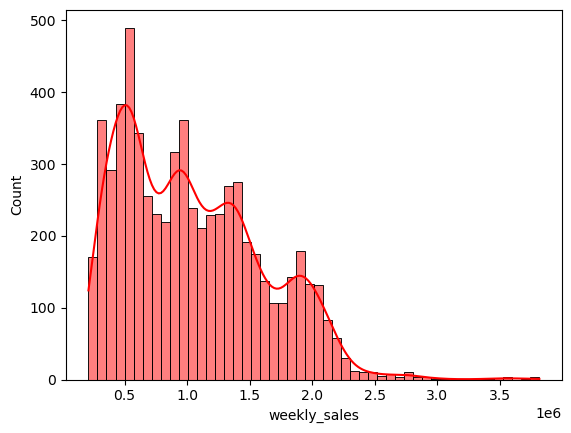

In [32]:
sns.histplot(df.weekly_sales,kde=True,bins=50,color='Red')
plt.show()

In [33]:
#categorical
df.holiday_flag.value_counts()

0    5985
1     450
Name: holiday_flag, dtype: int64

In [34]:
df.holiday_flag.value_counts().index

Int64Index([0, 1], dtype='int64')

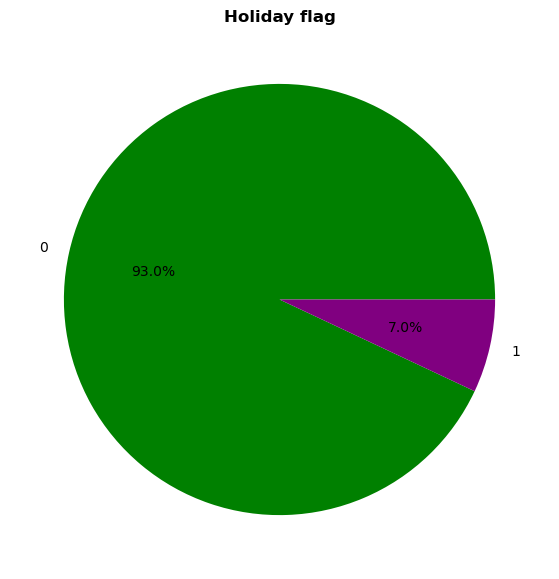

In [35]:
plt.figure(figsize=(8,7))
plt.pie(x=df.holiday_flag.value_counts(),labels = df.holiday_flag.value_counts().index, autopct="%1.1f%%",colors=['green','purple'])
plt.title('Holiday flag',weight='bold')
plt.show()

# Bivariate Analysis

In [36]:
#categorical vs categorical

In [37]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [38]:
df.store.nunique()

45

In [39]:
store_sales = df.groupby('store')['weekly_sales'].sum().reset_index()
store_sales_sorted = store_sales.sort_values(by='weekly_sales', ascending=False)

In [40]:
store_sales_sorted.head()

,store,weekly_sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


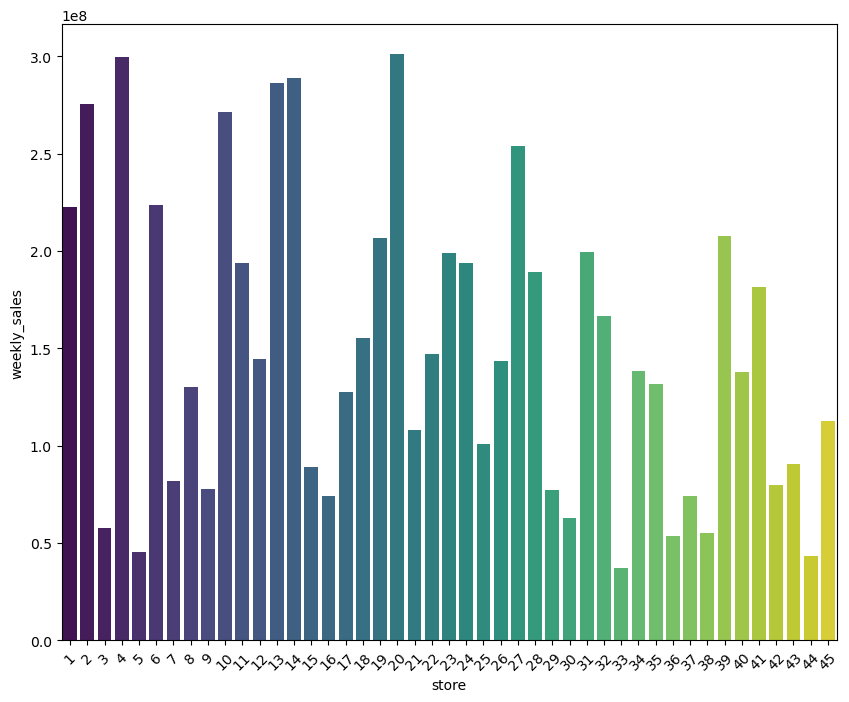

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(x='store',y='weekly_sales',data=store_sales_sorted,palette='viridis')
plt.xticks(rotation=45)
plt.show()

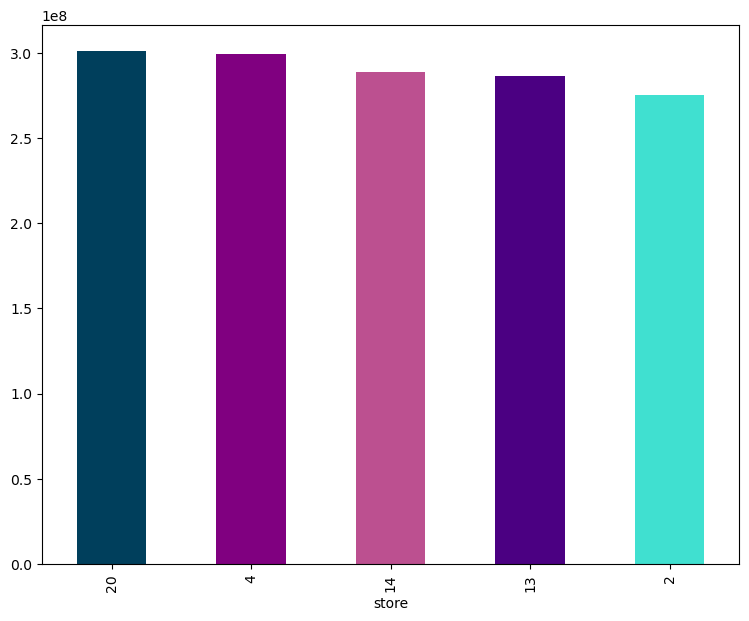

In [42]:
plt.figure(figsize=(9,7))
df.groupby('store')['weekly_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar',color=['#003f5c','purple','#bc5090','indigo','turquoise'])
plt.show()

In [43]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

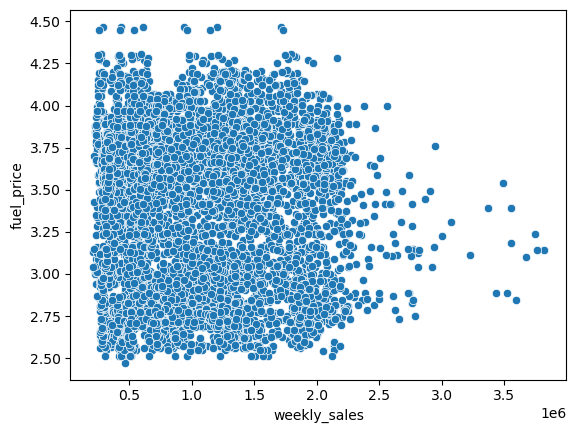

In [44]:
sns.scatterplot(data=df, x='weekly_sales',y='fuel_price')
plt.show()

# T-test

Independent t-test for holiday vs mean of sales

In [45]:
t_df = df.groupby('holiday_flag')['weekly_sales'].mean().sort_values(ascending=False).reset_index()
t_df

,holiday_flag,weekly_sales
0,1,1.122888e+06
1,0,1.041256e+06


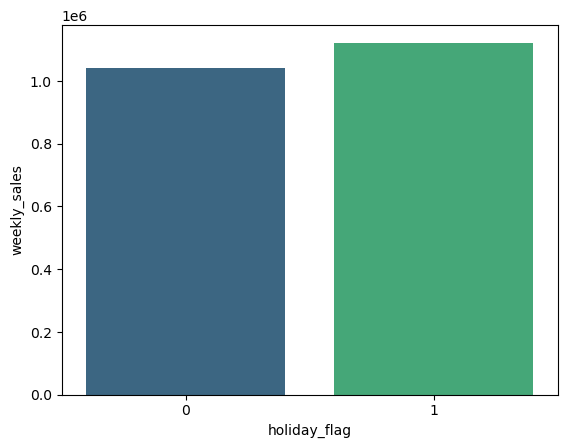

In [46]:
#weekly sales, holiday flag checking if mean of sales differ with holiday

sns.barplot(x='holiday_flag', y='weekly_sales', data=t_df.head(10),palette='viridis')
plt.show()

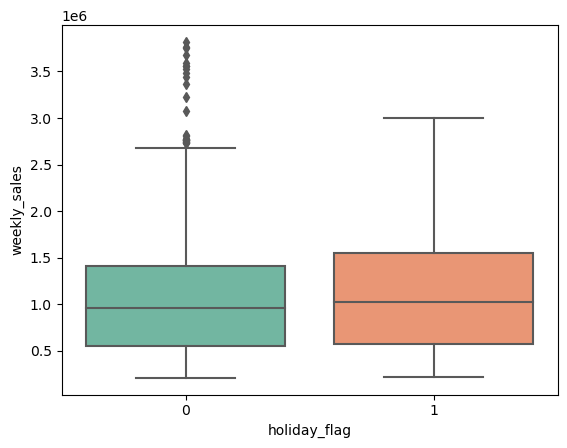

In [47]:
sns.boxplot(x='holiday_flag',y='weekly_sales',data=df,palette='Set2')
plt.show()

In [48]:
 #independent two groups to apply a t-test
group1 = df[df['holiday_flag']==0]
group2 = df[df['holiday_flag']==1]
group1.shape,group2.shape

((5985, 8), (450, 8))

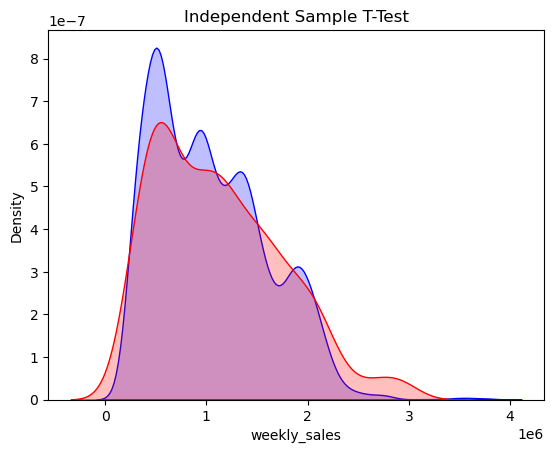

In [49]:
sns.kdeplot(group1['weekly_sales'],shade=True,color='blue')
sns.kdeplot(group2['weekly_sales'], shade=True,color='red')
plt.title("Independent Sample T-Test")
plt.show()

In [50]:
#to check homogenity of variance between two independent groups (the hypothesis is that the variance of two groups is equal)
#mean of two group is equal or  Variance of sales during holidays = variance of sales during non-holidays
a=group1['weekly_sales']
b=group2['weekly_sales']

In [51]:
stats.levene(a,b)

LeveneResult(statistic=10.519203649624915, pvalue=0.0011874337918717478)

P-value suggests that we reject the null hypothesis so equality of variance isnot  satisfied hence we go for a welch t-test


In [52]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = False)
print(tStat,"p-value: ",pValue)

-2.6800720209265423 p-value:  0.007601552012134143


P-value >0.05 suggests that we don't have enough evidence to reject the null hypothesis
hence The mean weekly sales during holidays = mean sales during non-holidays
 

In [53]:
df.corr()

,weekly_sales,temperature,fuel_price,cpi,unemployment
weekly_sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
fuel_price,0.009464,0.144982,1.000000,-0.170642,-0.034684
cpi,-0.072634,0.176888,-0.170642,1.000000,-0.302020
unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

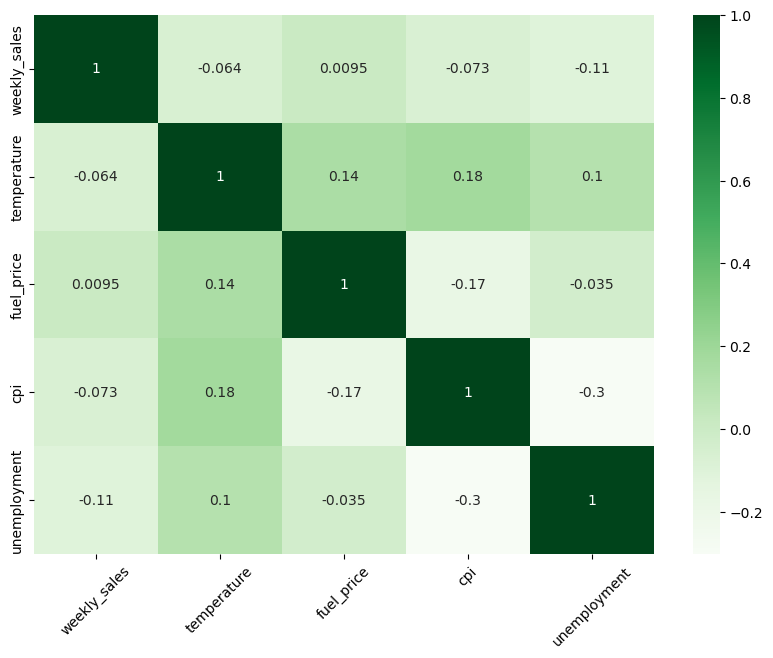

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.xticks(rotation=45)
plt.show

In [55]:
df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   object        
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   object        
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 402.3+ KB


<Figure size 900x800 with 0 Axes>

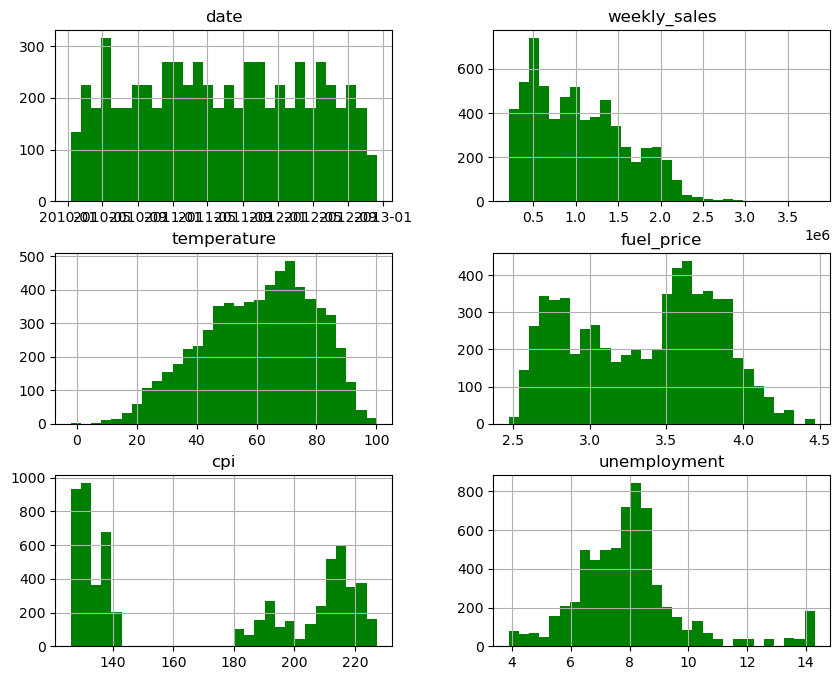

In [57]:
plt.figure(figsize=(9,8))
df.hist(grid=True,
       figsize=(10, 8),
       bins=30,color='green')

plt.show()

In [58]:
df.describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [59]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [60]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [61]:
#transforming date into day, month, week and year
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [62]:
df.year.unique()

array([2010, 2011, 2012], dtype=int64)

In [63]:
df=df.drop('date',axis=1)

In [64]:
df['weekday'] = df['weekday'].astype('object')
df['month'] = df['month'].astype('object')


def hourCat(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <=hour <12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['hour_bin'] = df['hour'].map(hourCat)

In [65]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


# Univariate Analysis

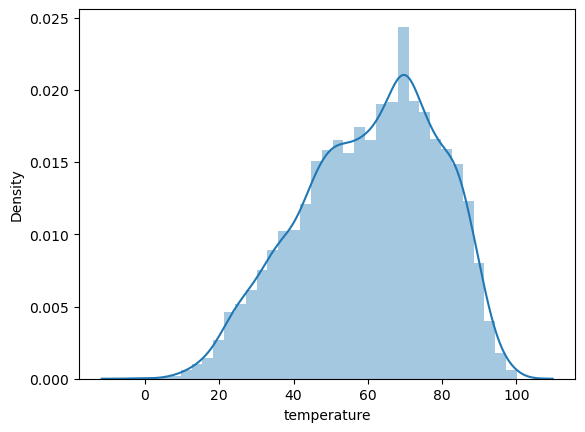

In [66]:
#numerical feature
#temperature
sns.distplot(df.temperature)
plt.show()

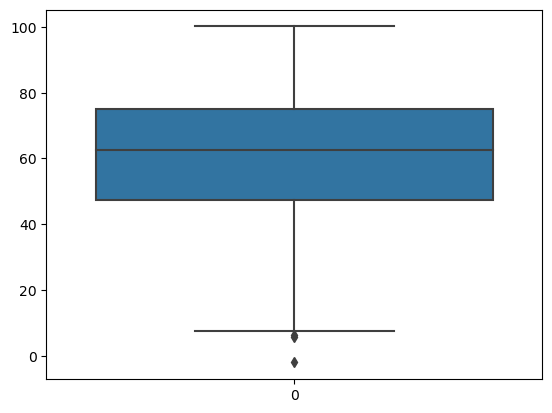

In [67]:
sns.boxplot(df.temperature)
plt.show()

# Bivariate Analysis

In [68]:
df.columns

Index(['store', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'cpi', 'unemployment', 'weekday', 'month', 'year'],
      dtype='object')

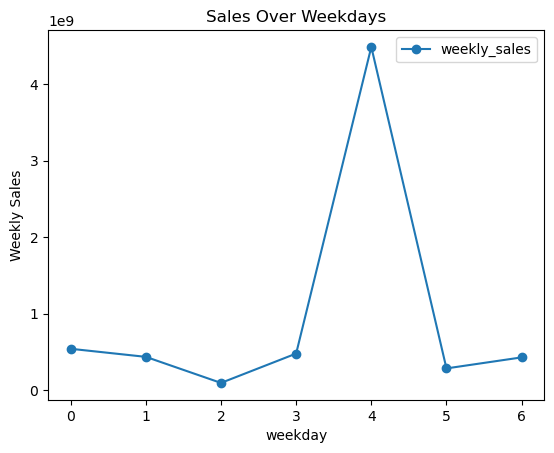

In [69]:
df.groupby('weekday').agg({'weekly_sales':'sum'}).plot(kind='line',marker='o',title='Sales Over Weekdays')
plt.ylabel('Weekly Sales')
plt.show()

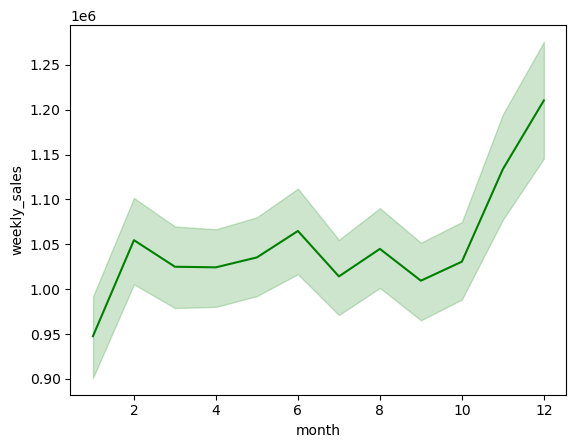

In [70]:
sns.lineplot(data=df,x='month',y='weekly_sales',color='Green')

plt.show()

In [71]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   object 
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   object 
 3   temperature   6435 non-null   float64
 4   fuel_price    6435 non-null   float64
 5   cpi           6435 non-null   float64
 6   unemployment  6435 non-null   float64
 7   weekday       6435 non-null   object 
 8   month         6435 non-null   object 
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 502.9+ KB


In [73]:
df.describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment,year
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151,2010.965035
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885,0.797019
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,2010.000000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000,2010.000000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000,2011.000000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000,2012.000000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000,2012.000000


# PCA

In [74]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [75]:
X = df.drop(['weekly_sales','store'],axis=1)
y = df['weekly_sales']

In [76]:
sc = StandardScaler()

In [77]:
X_sc = sc.fit_transform(X)

In [78]:
X_sc.shape

(6435, 8)

In [79]:
pca = PCA(n_components = 8)
principalComponents = pca.fit_transform(X_sc)

In [80]:
X_sc

array([[-0.27420425, -0.99513556, -1.71379998, ...,  1.70110303,
        -0.44422923, -1.21089907],
       [ 3.64691651, -1.20117022, -1.76608938, ..., -0.40198976,
         1.66322793, -1.21089907],
       [-0.27420425, -1.12417832, -1.84016603, ...,  0.29904117,
        -1.34742516, -1.21089907],
       ...,
       [-0.27420425, -0.33582468,  1.39741931, ..., -2.50508255,
         1.66322793,  1.29864538],
       [-0.27420425, -0.22738539,  1.32987884, ...,  0.29904117,
         1.06109731,  1.29864538],
       [-0.27420425, -0.09834264,  1.14032976, ...,  0.29904117,
         1.06109731,  1.29864538]])

In [81]:
X_sc.shape

(6435, 8)

In [82]:
pca.explained_variance_ratio_.sum()


1.0

In [83]:
pca.explained_variance_ratio_[:6].sum()

0.916820057380733

In [84]:
cum_exp_var = []
s=0
for i in pca.explained_variance_ratio_:
    s+=i
    cum_exp_var.append(s)

Text(0, 0.5, 'Cumulative variance explained')

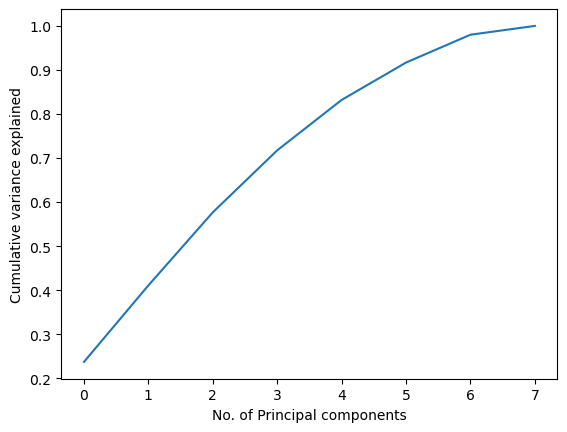

In [85]:
plt.plot(range(8),cum_exp_var) 
plt.xlabel('No. of Principal components')
plt.ylabel('Cumulative variance explained')

# Applying PCA is not relevant to the dataset is not significant hence we go with original features of the dataset

# when not to use PCA
1. when dataframe contains categorical features significantly
2. when relationship is not linear

# MODELING

# LINEAR REGRESSION

In [86]:
#assumption is there is no linear relationship

In [87]:
#using ordinary least square
#define response variable
y = df['weekly_sales']
X = df.drop(['weekly_sales','store'],axis=1)

In [88]:
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: weekly_sales, dtype: float64

In [89]:
X.head()

,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,38.51,2.548,211.242170,8.106,3,12,2010
2,0,39.93,2.514,211.289143,8.106,4,2,2010
3,0,46.63,2.561,211.319643,8.106,4,2,2010
4,0,46.50,2.625,211.350143,8.106,0,5,2010


In [90]:
X.shape,y.shape

((6435, 8), (6435,))

In [91]:
X = sm.add_constant(X_sc)


In [92]:
ols = sm.OLS(y,X)


In [93]:
model=ols.fit()

In [94]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           weekly_sales   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     26.43
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.23e-40
Time:                        15:25:06   Log-Likelihood:                -94248.
No. Observations:                6435   AIC:                         1.885e+05
Df Residuals:                    6426   BIC:                         1.886e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+06   6926.708    151.149      0.0

In [97]:
X[:3]

array([[ 1.        , -0.27420425, -0.99513556, -1.71379998,  1.00417522,
         0.05696366,  1.70110303, -0.44422923, -1.21089907],
       [ 1.        ,  3.64691651, -1.20117022, -1.76608938,  1.00788038,
         0.05696366, -0.40198976,  1.66322793, -1.21089907],
       [ 1.        , -0.27420425, -1.12417832, -1.84016603,  1.009074  ,
         0.05696366,  0.29904117, -1.34742516, -1.21089907]])

In [134]:
X = df.drop('weekly_sales',axis=1)
y = df['weekly_sales']

In [135]:
X.head()

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,1,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,0,46.50,2.625,211.350143,8.106,0,5,2010


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11, shuffle=True)

In [137]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5791, 9), (644, 9), (5791,), (644,))

In [138]:
X_train.head()

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
1586,12,0,70.15,3.127,126.289800,14.099,0,7,2010
4056,29,0,26.39,3.240,133.183419,10.256,5,4,2011
5554,39,0,78.31,3.561,220.428712,6.989,4,5,2012
6387,45,0,50.19,3.452,188.502435,8.523,5,2,2011
2629,19,0,23.24,3.452,133.492143,7.771,4,2,2011


In [139]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
X_train=pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(data=X_test_scaled,columns=X_test.columns,index=X_test.index)

# LinearRegression

In [140]:
lr = LinearRegression()

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np


In [147]:
# building a function to store models results and display for comparison
def store_results(name, y_train, X_train, y_test, X_test,model, folds, norm, Alpha):

    """    creates and entry to add to the resuts dataframe
    name: name of the model 
    y_pred: predicted y 
    y_train: true value of y
    x_train: features 
    model: model to be fit
    folds: number of folds in cv
    norm: L1 or L2
    Alpha: Value of regularization parameter"""
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train) # predictions on the train set.
    r2_val = r2_score(y_train,y_pred)
    r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
    rmse_error = mean_squared_error (y_train, y_pred, squared = False)
    y_pred_test = model.predict(X_test)
    r2_val_test = r2_score(y_test,y_pred_test)
    r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
    rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
    crossvalidation = cross_val_score(model, X_train, y_train, cv=folds, n_jobs=-1)
    
    entry = {'Model': [name],
          'Regularization' : [norm],
          'Alpha_value' : [Alpha],
         'R2Score': [r2_val],
         'Adjusted_R2Score': [r2_adj_val],
         'RMSE': [rmse_error],
         'R2Score_Test': [r2_val_test],
         'Adjusted_R2Score_test': [r2_adj_val_test],
         'RMSE_Test': [rmse_error_test],
          'CrossVal_Mean(r2)': [crossvalidation.mean()],           
          'CrossVal1(r2)': [crossvalidation[0]],
          'CrossVal2(r2)': [crossvalidation[1]],
          'CrossVal3(r2)': [crossvalidation[2]],
          'CrossVal4(r2)': [crossvalidation[3]],
          'CrossVal5(r2)': [crossvalidation[4]],
          }


    result = pd.DataFrame(entry)
    return result

In [148]:
temp = store_results("LinearRegression",  y_train,X_train, y_test,X_test, lr, 5, np.nan, np.nan)
temp

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.16379,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203


In [149]:
 outcomes=temp.copy()

# KNN

In [152]:
from sklearn.neighbors import KNeighborsRegressor

In [153]:
knn = KNeighborsRegressor(n_neighbors=5)

In [155]:
temp =store_results("knn",  y_train,X_train, y_test,X_test, knn, 5, np.nan, np.nan)

outcomes = outcomes.append (temp)
outcomes

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203
0,knn,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565


# SUPPORT VECTORS

In [157]:
from sklearn.svm import SVR
svr = SVR()

In [160]:
temp =store_results("svr",  y_train,X_train, y_test,X_test, svr, 5, np.nan, np.nan)

outcomes = outcomes.append (temp)
outcomes

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203
0,knn,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,-0.024120,-0.025714,569778.175524,-0.015811,-0.030231,580186.165196,-0.024625,-0.025021,-0.026665,-0.035159,-0.013039,-0.023243


# DECISION TREE REGRESSOR

In [159]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=11)

In [161]:
temp =store_results("dt",  y_train,X_train, y_test,X_test, dt, 5, np.nan, np.nan)

outcomes = outcomes.append (temp)
outcomes

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203
0,knn,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,-0.024120,-0.025714,569778.175524,-0.015811,-0.030231,580186.165196,-0.024625,-0.025021,-0.026665,-0.035159,-0.013039,-0.023243
0,dt,NaN,NaN,1.000000,1.000000,0.000000,0.934419,0.933488,147417.484814,0.888770,0.877946,0.887477,0.890503,0.912159,0.875767


# RANDOM FOREST

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
rf = RandomForestRegressor(random_state=11)

In [166]:
temp =store_results("Random Forest",  y_train,X_train, y_test,X_test,rf, 5, np.nan, np.nan)

outcomes = outcomes.append (temp)
outcomes

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203
0,knn,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,-0.024120,-0.025714,569778.175524,-0.015811,-0.030231,580186.165196,-0.024625,-0.025021,-0.026665,-0.035159,-0.013039,-0.023243
0,dt,NaN,NaN,1.000000,1.000000,0.000000,0.934419,0.933488,147417.484814,0.888770,0.877946,0.887477,0.890503,0.912159,0.875767
0,Random Forest,NaN,NaN,0.991681,0.991668,51353.300977,0.947861,0.947121,131443.934238,0.937520,0.927770,0.944543,0.940153,0.946177,0.928957


# ADABOOST

In [168]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=11)

In [169]:
temp =store_results("Adaboost",  y_train,X_train, y_test,X_test,ada, 5, np.nan, np.nan)

outcomes = outcomes.append (temp)
outcomes

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203
0,knn,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,-0.024120,-0.025714,569778.175524,-0.015811,-0.030231,580186.165196,-0.024625,-0.025021,-0.026665,-0.035159,-0.013039,-0.023243
0,dt,NaN,NaN,1.000000,1.000000,0.000000,0.934419,0.933488,147417.484814,0.888770,0.877946,0.887477,0.890503,0.912159,0.875767
0,Random Forest,NaN,NaN,0.991681,0.991668,51353.300977,0.947861,0.947121,131443.934238,0.937520,0.927770,0.944543,0.940153,0.946177,0.928957
0,Adaboost,NaN,NaN,0.344794,0.343774,455742.221887,0.364316,0.355292,458966.951200,0.366691,0.363483,0.325682,0.445668,0.294202,0.404420


# XGBOOST

In [170]:
from xgboost import XGBRegressor

In [171]:
xgb = XGBRegressor(random_state=11, n_estimators=100, learning_rate=0.1)

In [172]:
temp =store_results("XGboost",  y_train,X_train, y_test,X_test,xgb, 5, np.nan, np.nan)

outcomes = outcomes.append (temp)
outcomes

,Model,Regularization,Alpha_value,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,LinearRegression,NaN,NaN,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142,0.136744,0.149818,0.136663,0.135283,0.147203
0,knn,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612,0.355620,0.320673,0.346994,0.329209,0.330565
0,svr,NaN,NaN,-0.024120,-0.025714,569778.175524,-0.015811,-0.030231,580186.165196,-0.024625,-0.025021,-0.026665,-0.035159,-0.013039,-0.023243
0,dt,NaN,NaN,1.000000,1.000000,0.000000,0.934419,0.933488,147417.484814,0.888770,0.877946,0.887477,0.890503,0.912159,0.875767
0,Random Forest,NaN,NaN,0.991681,0.991668,51353.300977,0.947861,0.947121,131443.934238,0.937520,0.927770,0.944543,0.940153,0.946177,0.928957
0,Adaboost,NaN,NaN,0.344794,0.343774,455742.221887,0.364316,0.355292,458966.951200,0.366691,0.363483,0.325682,0.445668,0.294202,0.404420
0,XGboost,NaN,NaN,0.980202,0.980171,79221.856013,0.970180,0.969757,99406.075684,0.956519,0.952408,0.965568,0.950050,0.966188,0.948379


In [ ]:
#scaling data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
r2_scores = []
rmse_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Linear Regression R²:", np.mean(r2_scores))
print("Linear Regression RMSE:", np.mean(rmse_scores))

In [ ]:
X.head()

In [ ]:
model.rsqured, np.sqrt(model.mse_resid) # gives RMSE

In [174]:
outcomes.columns

Index(['Model', 'Regularization', 'Alpha_value', 'R2Score', 'Adjusted_R2Score',
       'RMSE', 'R2Score_Test', 'Adjusted_R2Score_test', 'RMSE_Test',
       'CrossVal_Mean(r2)', 'CrossVal1(r2)', 'CrossVal2(r2)', 'CrossVal3(r2)',
       'CrossVal4(r2)', 'CrossVal5(r2)'],
      dtype='object')

# MODEL COMPARISON

In [176]:
outcomes[['Model',  'R2Score', 'Adjusted_R2Score',
       'RMSE', 'R2Score_Test', 'Adjusted_R2Score_test', 'RMSE_Test',
       'CrossVal_Mean(r2)']].sort_values(by='Adjusted_R2Score_test',ascending=False)

,Model,R2Score,Adjusted_R2Score,RMSE,R2Score_Test,Adjusted_R2Score_test,RMSE_Test,CrossVal_Mean(r2)
0,XGboost,0.980202,0.980171,79221.856013,0.970180,0.969757,99406.075684,0.956519
0,Random Forest,0.991681,0.991668,51353.300977,0.947861,0.947121,131443.934238,0.937520
0,dt,1.000000,1.000000,0.000000,0.934419,0.933488,147417.484814,0.888770
0,knn,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612
0,svr,0.597741,0.597115,357094.570448,0.431489,0.423418,434040.631648,0.336612
0,Adaboost,0.344794,0.343774,455742.221887,0.364316,0.355292,458966.951200,0.366691
0,LinearRegression,0.144904,0.143573,520640.393543,0.163790,0.151919,526403.345606,0.141142
0,svr,-0.024120,-0.025714,569778.175524,-0.015811,-0.030231,580186.165196,-0.024625
